**Beteiligte:** Alessio Lopo, Jelle Schutter

<div style="width: 80%">
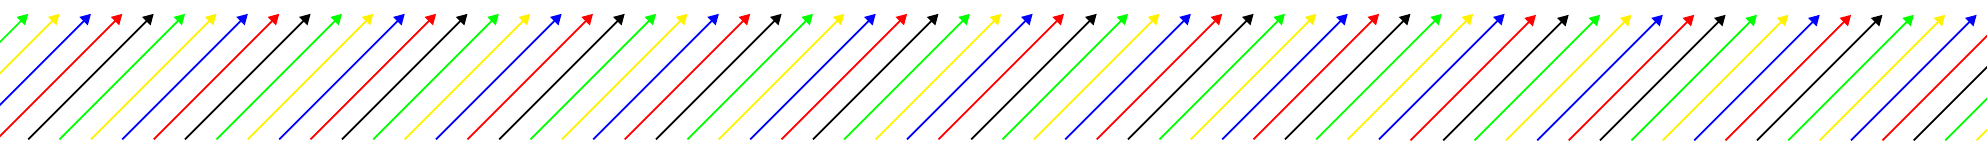<br>
<div style="font-size: 20pt; float: left;">Grundlagen der linearen Algebra</div>
<div style="font-size: 20pt; text-align: right;">HS 2020</div>
<div style="font-size: 15pt; margin-top: 10px;">Fachexperten: Roger Burkhardt, Joana Portmann</div>
</div>
<br>


# Mini-Challenge 2 zum Thema *Matrizenalgebra*

In der zweiten Mini-Challenge setzen Sie sich vertieft mit den verschiedenen Matrizenoperationen, die Sie inzwischen in Skript und Übungen kennengelernt haben sollten, auseinander. Zusätzlich vertiefen Sie Ihr Wissen über die numpy-Bibliothek, indem Sie einige besprochene Methoden konkret implementieren und dadurch die Besonderheiten von numpy kennenlernen, an die man sich durchaus etwas gewöhnen muss. Mit der Lösung dieser Mini-Challenge und dem genauen Verständnis aller getätigten Schritte können Sie sich ein erstes leicht vertieftes Wissen über numpy aneignen, dass Sie in einigen weitern wichtigen Kompetenzen des Studiums wieder dringend brauchen werden (Machine Learning, Deep Learning, High-Performance Computing, ..). Stellen Sie also sicher, dass Sie jeden einzelnen Schritt gut verstanden haben, dann werden die kommenden Mini-Challenges für Sie wesentlich einfacher sein.

**zu beachten:**

* Wir stellen Ihnen teilweise schon ein Rahmengerüst der Implementierung zur Verfügung. Verändern Sie bitte diese Gerüste nicht, sondern fügen Sie Ihren Code bei den entsprechenden Kommentaren ein. 

* Sie dürfen in dieses Notebook über den Menüpunkt 'Insert' durchaus weitere Zeilen einfügen. Falls Sie gerne Markdown-Notizen in die Zelle einfügen möchten, können Sie den Modus der Zelle von 'Code' auf 'Markdown' setzen (oder Esc-M drücken).

* Je besser Sie Ihre Berechnungen und Ihren Code kommentieren, desto eher können Sie bei Fehlern noch Teilpunkte erhalten.

**Abgabeformalitäten:**

* Geben Sie das ergänzte Jupyter-Notebook spätestens bis zum **04.11.2019** um **09:00** per Email an [Roger Burkhardt](mailto:roger.burkhardt@fhnw.ch) ab.
* Die Mini-Challenge wird nicht mit einer Note bewertet, sondern nur danach beurteilt, ob diese sinnvoll bearbeitet wurde. Es muss mindestens eine Mini-Challenge sinnvoll bearbeitet worden sein, damit Sie zum Portfoliogespräch zugelassen werden.
* Sie dürfen die Mini-Challenge in Teams (Teamgrösse: max. 4 Personen) lösen und abgeben. 
* Ausserhalb der Teams darf durchaus über die Übung diskutiert werden, programmieren soll aber jede Gruppe für sich. Gleichen sich zwei abgegebene Notebooks zu stark, werden die Notebooks beider Parteien als nicht sinnvoll bearbeitet betrachtet.

Für diese Mini-Challenge benötigen Sie nur die numpy-Bibliothek, für die freiwilligen Aufgaben sind `sympy` und `matplotlib` ebenfalls erlaubt:

In [1]:
import numpy as np
import sympy as sp
from IPython.display import display, Math

## Aufgabe 1: Das Matrizenprodukt

Gegeben seien die Matrizen

$$
A = \begin{pmatrix} 2 & 2 & -2 \\ 1 & 0 & 2 \\ -2 & -3 & 3 \end{pmatrix}, \qquad B = \begin{pmatrix} 5 & -2 \\ -1 & 7 \\ 0 & 0 \end{pmatrix}, \qquad C = \begin{pmatrix} 0 & 3 \\ 3 & -5 \end{pmatrix}, \qquad D = \begin{pmatrix} 1 & -1 \end{pmatrix}
$$

Berechnen Sie systematisch alle möglichen Produkte mit numpy. Definieren Sie dazu eine Liste aller Matrizen und iterieren Sie mit zwei for-Loops darüber, um alle möglichen Kombinationen abzudecken. Denken Sie daran, dass das Matrizenprodukt nicht kommutativ ist.

**Hinweise:** 
* Wenn Sie nicht prüfen, ob ein bestimmtes Matrizenprodukt überhaupt möglich ist, dann wird der for-Loop mit einem Fehler abbrechen. Prüfen Sie die Existenz des Produkts über das `shape`-Attribut der numpy-Arrays und geben Sie entweder das Matrixprodukt aus oder eine Meldung, dass das Produkt nicht existiert.
* Wir stellen Ihnen eine Funktion `numpy2latex` zur Verfügung, die ein numpy-Array schön mit LateX für das Jupyter-Notebook formatiert. Studieren Sie die Beispielausgabe und verwenden Sie diese Funktion in Ihrem Code.
* Mit [Format-Strings](https://pyformat.info/) können Sie Ihre Ausgabe sauber organisieren: `print( "Wert: {}".format( wert ) )`

In [2]:
def numpy2latex( A ):
    """
    Funktion zum Umwandeln eines zweidimensionalen numpy-Arrays in einen Latex-String.
    """
    # Prüfe, ob das übergebene Array zwei Dimensionen besitzt
    if len( A.shape ) > 2:
        raise Exception( "Nur zweidimensionale Arrays erlaubt!" )
    
    # Erstelle latex-String
    latex = "\\begin{pmatrix}"
    for i in range( A.shape[0] ):
        line = ""
        for j in range( A.shape[1] ):
            line += str( A[i,j] ) + " & "
        latex += line + " \\\\ "
    latex += "\\end{pmatrix}"
    return latex

# Erstelle eine Beispielmatrix und gebe sie mit `display` und `Math` aus
M = np.array( [[3, -2], [-7, 6]] )
display(Math(numpy2latex( M )))

def display_comparison(left, right, symbols = False):
    if symbols:
        display(Math(sp.latex(left) + '=' + sp.latex(right)))
    else:
        display(Math(sp.latex(np.around(left, 10)) + '=' + sp.latex(np.around(right, 10))))


<IPython.core.display.Math object>

In [3]:
# IHR CODE
def exercise_1():
    A = np.array([
        [2, 2, -2],
        [1, 0, 2],
        [-2, -3, 3]
    ])

    B = np.array([
        [5, -2],
        [-1, 7],
        [0, 0]
    ])

    C = np.array([
        [0, 3],
        [3, -5]
    ])

    D = np.array([
        [1, -1]
    ])

    all_matrix = {
        'A': A,
        'B': B,
        'C': C,
        'D': D
    }

    for letter_1 in all_matrix:
        matrix_1 = all_matrix[letter_1]
        for letter_2 in all_matrix:
            matrix_2 = all_matrix[letter_2]
            if matrix_1.shape[1] == matrix_2.shape[0]:
                display(Math(letter_1 + ' \cdot ' + letter_2 + '=' + numpy2latex(np.dot(matrix_1, matrix_2))))

exercise_1()

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

## Aufgabe 2: Rechenregeln der Determinante

Zeigen Sie beispielhaft an der quadratischen Matrix **A** aus Aufgabe 1 die Richtigkeit einiger Rechenregeln zur Determinante:

**a)** $\det(k A) = k^n \det(A)$, wobei $n$ die Zeilen bzw. Spaltenanzahl von **A** bezeichne. Benutzen Sie beispielhaft den Wert $k = 0.1$

**b)** $\det(A^{-1}) = \frac{1}{\det{A}}$

**c)** $\det(AB) = \det(A) \det(B)$ für $B \in \mathbb{R}^{3\times3}$ beliebig nach Ihrer Wahl

**d)** $\det(A^n) = \det(A)^n$ für $n=10$

**e)** $\det(A) \to -\det(A)$, wenn zwei Zeilen oder Spalten der Matrix vertauscht werden (ein Beispiel genügt)

**f)** $\det(A)$ verändert sich nicht, wenn eine Zeile der Matrix zu einer anderen Zeile dazuaddiert wird (ein Beispiel genügt)

**Führen Sie dabei alle Rechenschritte mit Python aus**

**Hinweise**: 
* numpy's Funktionen zur Berechnung der Determinante und der Inverse erzeugen schnell numerische Fehler im Bereich von $< 10^{-15}$. Diese Fehler sind zwar für uns vernachlässigbar klein, aber sind einerseits optisch unschön und machen andererseits Probleme, wenn man mit dem Vergleichsoperator auf das erwartete Resultat prüfen möchte. Falls solche Fehler auftreten, verwenden Sie die Funktion `np.isclose( x, y )` statt `x == y`.
* Wichtig für **e)** und **f)**: Beachten Sie, dass die Zuweisung `A2 = A` keine Kopie der Matrix `A` macht, sondern nur einen neuen Zeiger auf das gleiche Objekt. Wenn Sie nach einer derartigen Zuweisung `A` verändern, verändern Sie damit automatisch auch `A2`. Benutzen Sie für eine echte Kopie `A2 = A.copy()` und stellen Sie am Schluss sicher, dass Sie die ursprüngliche Matrix `A` nicht verändert haben.
* Auch mit dem Zugriff auf einzelne Zeilen oder Spalten per Index bekommen Sie nicht eine Kopie der Zeile/Spalte zurück, sondern ebenfalls nur einen Zeiger, passen Sie also auf!

In [4]:
# IHR CODE

def exercise_2a():
    k = 0.1
    A = np.array([
        [2, 2, -2],
        [1, 0, 2],
        [-2, -3, 3]
    ])

    kA = A.dot(k)

    return np.linalg.det(kA), k ** A.shape[1] * np.linalg.det(A)

exercise_2a_1, exercise_2a_2 = exercise_2a()

display_comparison(exercise_2a_1, exercise_2a_2)
print(np.isclose(exercise_2a_1, exercise_2a_2))

<IPython.core.display.Math object>

True


In [5]:
def exercise_2b():
    A = np.array([
        [2, 2, -2],
        [1, 0, 2],
        [-2, -3, 3]
    ])

    A_inverse = np.linalg.inv(A)

    return np.linalg.det(A_inverse), 1 / np.linalg.det(A)

exercise_2b_1, exercise_2b_2 = exercise_2b()

display_comparison(exercise_2b_1, exercise_2b_2)
print(np.isclose(exercise_2b_1, exercise_2b_2))

<IPython.core.display.Math object>

True


In [6]:
def exercise_2c():
    A = np.array([
        [2, 2, -2],
        [1, 0, 2],
        [-2, -3, 3]
    ])

    # create random 3x3 matrix
    B = np.random.randint(-25, 25, (3, 3))

    return np.linalg.det(A.dot(B)), np.linalg.det(A) * np.linalg.det(B)

exercise_2c_1, exercise_2c_2 = exercise_2c()

display_comparison(exercise_2c_1, exercise_2c_2)
print(np.isclose(exercise_2c_1, exercise_2c_2))

<IPython.core.display.Math object>

True


In [7]:
def exercise_2d():
    n = 10
    A = np.array([
        [2, 2, -2],
        [1, 0, 2],
        [-2, -3, 3]
    ])

    return np.linalg.det(np.linalg.matrix_power(A, n)), np.linalg.det(A) ** n

exercise_2d_1, exercise_2d_2 = exercise_2d()

display_comparison(exercise_2d_1, exercise_2d_2)
print(np.isclose(exercise_2d_1, exercise_2d_2))

<IPython.core.display.Math object>

True


In [8]:
def exercise_2e():
    n = 10
    A = np.array([
        [2, 2, -2],
        [1, 0, 2],
        [-2, -3, 3]
    ])

    B = A.copy()

    B[[0,1]] = B[[1,0]]

    return np.linalg.det(A), -np.linalg.det(B)

exercise_2e_1, exercise_2e_2 = exercise_2e()

display_comparison(exercise_2e_1, exercise_2e_2)
print(np.isclose(exercise_2e_1, exercise_2e_2))

<IPython.core.display.Math object>

True


In [9]:
def exercise_2f():
    n = 10
    A = np.array([
        [2, 2, -2],
        [1, 0, 2],
        [-2, -3, 3]
    ])

    B = A.copy()

    B[1] = B[1] + B[0]

    return np.linalg.det(A), np.linalg.det(B)

exercise_2f_1, exercise_2f_2 = exercise_2f()

display_comparison(exercise_2f_1, exercise_2f_2)
print(np.isclose(exercise_2f_1, exercise_2f_2))

<IPython.core.display.Math object>

True


### Freiwillige Zusatzaufgabe: Symbolisches Rechnen

Sie können die Rechenregeln **a)**-**c)** auch mit sympy relativ einfach für allgemeine Matrizen zeigen. Benutzen Sie dazu zum Beispiel die folgende aus vier Symbolen definierte allgemeine $2\times2$-Matrix:

In [10]:
a, b, c, d = sp.symbols(['a','b','c','d'])
A = sp.Matrix( [[a,b],[c,d]] )
A

Matrix([
[a, b],
[c, d]])

**Hinweis**: komplizierte Ausdrücke können Sie möglicherweise mit `sp.simplify()` vereinfachen.

In [11]:
# IHR CODE
def exercise_2_additional_a():
    a, b, c, d, k = sp.symbols(['a', 'b', 'c', 'd', 'k'])

    A = sp.Matrix([
        [a, b],
        [c, d]
    ])

    kA = A * k

    return sp.simplify(kA.det()), sp.simplify(k ** A.shape[1] * A.det())

exercise_2_additional_a_1, exercise_2_additional_a_2 = exercise_2_additional_a()

display_comparison(exercise_2_additional_a_1, exercise_2_additional_a_2, True)
print(exercise_2_additional_a_1 == exercise_2_additional_a_2)

<IPython.core.display.Math object>

True


In [12]:
def exercise_2_additional_b():
    a, b, c, d, k = sp.symbols(['a', 'b', 'c', 'd', 'k'])

    A = sp.Matrix([
        [a, b],
        [c, d]
    ])

    A_inverse = A.inv()

    return sp.simplify(A_inverse.det()), sp.simplify(1 / A.det())

exercise_2_additional_b_1, exercise_2_additional_b_2 = exercise_2_additional_b()

display_comparison(exercise_2_additional_b_1, exercise_2_additional_b_2, True)
print(exercise_2_additional_b_1 == exercise_2_additional_b_2)

<IPython.core.display.Math object>

True


In [13]:
def exercise_2_additional_c():
    a, b, c, d, k = sp.symbols(['a', 'b', 'c', 'd', 'k'])

    A = sp.Matrix([
        [a, b],
        [c, d]
    ])

    # create random 3x3 matrix
    B = np.random.randint(-10, 10, (2, 2))

    detB = np.around(np.linalg.det(B), 10)

    # convert detB to int because the expressions wont match since 1 != 1.0
    if detB.is_integer() and not isinstance(detB, int):
        detB = int(detB)

    return sp.simplify((A * B).det()), sp.simplify(A.det() * detB)

exercise_2_additional_c_1, exercise_2_additional_c_2 = exercise_2_additional_c()

display_comparison(exercise_2_additional_c_1, exercise_2_additional_c_2, True)
print(exercise_2_additional_c_1.equals(exercise_2_additional_c_2))

<IPython.core.display.Math object>

True


# Aufgabe 3: Lineare Gleichungssysteme ohne Gauss lösen

Im Folienmaterial lernen Sie zusätzlich zum Gauss-Algorithmus zwei weitere Möglichkeiten kennen, wie Sie die Lösung eines linearen Gleichungssystems berechnen können.

Gegeben seien die linearen Gleichungssysteme $G_1$:

$$
\left| \;
\begin{align}
x + y + z &= 2\\
6x - 4y + 5z &= 31\\
5x + 2y + 2z &=13
\end{align}
\;
\right|
$$

und $G_2$:

$$
\left| \;
\begin{align}
x + y + z &= 2\\
y - 3z &= 1\\
2x + y + 5z &=0
\end{align}
\;
\right|
$$

mit den erweiterten Koeffizientenmatrizen

In [14]:
M1 = np.array([
    [1, 1, 1,  2],
    [6,-4, 5, 31],
    [5, 2, 2, 13]
])
M2 = np.array([
    [1, 1, 1, 2],
    [0, 1,-3, 1],
    [2, 1, 5, 0]
])

## a) Lösung mit Hilfe der Inversen

Schreiben Sie eine Funktion `solve( M )`, die als Argument die erweiterte Koeffizientenmatrix eines linearen Gleichungssystems nimmt und es mittels der inversen Matrix löst. Probieren Sie Ihre Funktion an den beiden Gleichungssystemen $G_1$ und $G_2$ aus.

**Hinweis**: Dieses Verfahren funktioniert nur für invertierbare Koeffizientenmatrizen. Geben Sie mit `raise Exception("<Ihre Fehlermeldung>")` eine Fehlermeldung aus, falls die zu `M` gehörende Koeffizientenmatrix nicht invertierbar ist.

In [15]:
# IHR CODE

def solve(M):
    result = np.array([M[:, -1]])
    coefficient_matrix = M[:, :-1]
    if np.linalg.det(coefficient_matrix) == 0:
        raise Exception('Matrix kann nicht invertiert werden!')
    else:
        coefficient_matrix = np.linalg.inv(coefficient_matrix)
        return result.dot(np.swapaxes(coefficient_matrix, 0, 1))

[[x, y, z]] = solve(M1)

display(Math('$G_1$'))
display(Math('x=' + str(np.around(x, 10))))
display(Math('y=' + str(np.around(y, 10))))
display(Math('z=' + str(np.around(z, 10))))

solve(M2)


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Exception: Matrix kann nicht invertiert werden!

## b) Lösung mittels Cramer'scher Regel

Schreiben Sie nun eine Funktion `cramer( M )`, die als Argument ebenfalls die erweiterte Koeffizientenmatrix eines linearen Gleichungssystems nimmt, aber jetzt die Cramer'sche Regel zur Lösung verwendet. Probieren Sie Ihre Funktion ebenfalls an den beiden Gleichungssystemen $G_1$ und $G_2$ aus.

**Hinweis**: Hier funktioniert das Verfahren nur für Koeffizientenmatrizen mit Determinante ungleich Null, geben Sie ebenfalls falls nötig eine entsprechende Fehlermeldung aus.

In [16]:
# IHR CODE

def cramer(M):
    result = np.array([M[:, -1]])
    coefficient_matrix = M[:, :-1]

    detA = np.linalg.det(coefficient_matrix)

    if detA == 0:
        raise Exception('Matrix kann nicht berechnet werden!')
    else:
        solutions = []
        
        cols = coefficient_matrix.shape[1]

        for i in range(cols):
            tmp_matrix = coefficient_matrix.copy()
            tmp_matrix[:, i] = result
            solutions.append(np.linalg.det(tmp_matrix) / detA)

        return solutions

[x, y, z] = cramer(M1)

display(Math('$G_1$'))
display(Math('x=' + str(np.around(x, 10))))
display(Math('y=' + str(np.around(y, 10))))
display(Math('z=' + str(np.around(z, 10))))

[x, y, z] = cramer(M2)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Exception: Matrix kann nicht berechnet werden!

## c) Performance

Indem Sie [%timeit](https://ipython.readthedocs.io/en/stable/interactive/magics.html#magic-timeit) mit einem Leerzeichen vor den Aufruf der Funktion schreiben, können Sie Ihre beiden Funktionen `solve` und `cramer` jeweils mehrere Male laufen lassen und die durchschnittlich benötigte Laufzeit ausgeben lassen.

In [17]:
# IHR CODE
%timeit solve(M1)

78 µs ± 416 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [18]:
# IHR CODE
%timeit cramer(M1)

61.8 µs ± 286 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


Mit `np.random.rand()` können Sie auch grössere Matrizen generieren. Es ist zu erwarten, dass die Unterschiede bei grossen Matrizen noch grösser werden. Zum Beispiel:

In [19]:
S = np.random.rand(20,21)

Berechnen Sie auch hier die durchschnittlich benötigten Laufzeiten:

In [20]:
S1 = np.random.rand(2, 3)
S2 = np.random.rand(3, 4)
S3 = np.random.rand(4, 5)
S4 = np.random.rand(6, 7)
S5 = np.random.rand(10, 11)
S6 = np.random.rand(25, 26)

In [21]:
# IHR CODE
%timeit solve(S1)
%timeit solve(S2)
%timeit solve(S3)
%timeit solve(S4)
%timeit solve(S5)
%timeit solve(S6)

66.9 µs ± 210 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
75 µs ± 415 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
82.7 µs ± 804 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
97.3 µs ± 681 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
278 µs ± 2.45 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
1.07 ms ± 16.2 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [22]:
# IHR CODE
%timeit cramer(S1)
%timeit cramer(S2)
%timeit cramer(S3)
%timeit cramer(S4)
%timeit cramer(S5)
%timeit cramer(S6)

46.4 µs ± 73.5 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
60.4 µs ± 98.4 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
74.6 µs ± 197 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
105 µs ± 132 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
1.1 ms ± 12.5 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
12.2 ms ± 31.2 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


Was stellen Sie fest? Welche Ihrer Funktionen ist effizienter?

Die Lösung mit Hilfe der Inversen ist langsamer bei kleineren Matrizen jedoch schneller bei Matrizen, welche grösser sind als 5x6.

### Freiwilliger Zusatz

Überlegen Sie sich dazu auch, für welche spezifischen Problemfälle Sie 1) den Gaussalgorithmus, 2) die Inverse der Koeffizientenmatrix oder 3) die Cramer'sche Regel einsetzen würden (unterscheiden Sie dabei, ob Sie von Hand rechnen müssen oder den Computer benützen dürfen).

#### von Hand
Gaussalgorithmus immer bei m x n Matrizen.

Die Inverse der Koeffizientenmatrix bei bis zu 2 x 2 Marizen und bei grösseren Marizen die Cramer'sche Regel.

#### Computer
Gaussalgorithmus immer bei m x n Matrizen.

Die Inverse der Koeffizientenmatrix würden wir in allen anderen Fällen einsetzen da sie sowohl einfacher ist um zu programmieren als auch weniger Rechenleistung benötigt als die Cramer'sche Regel.
